# Miami University Deception Detection Database

The MU3D is a free resource containing 320 videos of Black and White targets, female and male, telling truths and lies. Eighty (20 Black female, 20 Black male, 20 White female, and 20 White male) targets were recorded speaking honestly and dishonestly about their social relationships. Each target generated four different videos (i.e., positive truth, negative truth, positive lie, negative lie), yielding 320 videos fully crossing target race, target gender, statement valence, and statement veracity. This database is accompanied by an excel codebook which includes data pertinent to the videos and targets included in the database.

https://sc.lib.miamioh.edu/handle/2374.MIA/6067

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Miami University Deception Detection Database

The MU3D is a free resource containing 320 videos of Black and White targets, female and male, telling truths and lies. Eighty (20 Black female, 20 Black male, 20 White female, and 20 White male) targets were recorded speaking honestly and dishonestly about their social relationships. Each target generated four different videos (i.e., positive truth, negative truth, positive lie, negative lie), yielding 320 videos fully crossing target race, target gender, statement valence, and statement veracity. This database is accompanied by an excel codebook which includes data pertinent to the videos and targets included in the database.

https://sc.lib.miamioh.edu/handle/2374.MIA/6067

In [ ]:
!wget 'https://sc.lib.miamioh.edu/bitstream/handle/2374.MIA/6067/MU3D-Package.zip?sequence=7&isAllowed=y' -O '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/donwload.zip'

/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/donwload.zip: No such file or directory


In [ ]:
!unzip '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/donwload.zip' -d '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/'

unzip:  cannot find or open /content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/donwload.zip, /content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/donwload.zip.zip or /content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/donwload.zip.ZIP.


## VIDEO DATA

In [ ]:
!unzip -P yj566238MiamiU '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/MU3D-Package/Videos.zip' -d '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/'

unzip:  cannot find or open /content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/MU3D-Package/Videos.zip, /content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/MU3D-Package/Videos.zip.zip or /content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/MU3D-Package/Videos.zip.ZIP.


In [ ]:
!ls -lrt '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/Videos' | wc -l

ls: cannot access '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/Videos': No such file or directory
0


## VIDEO LABELS

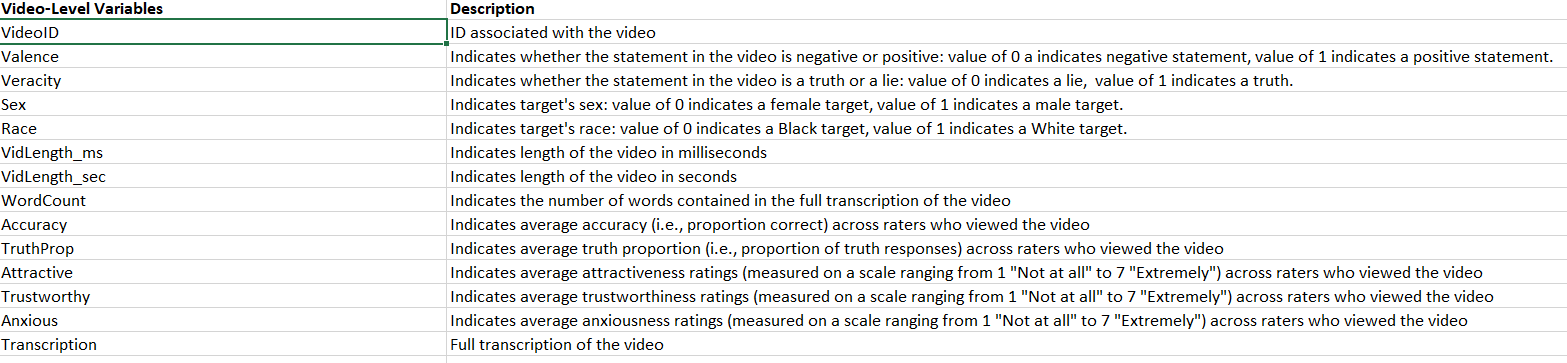

In [ ]:
!ls -lrt /content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/Videos/MU3D*

In [ ]:
import pandas as pd

video_label_data = pd.read_excel('/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/Videos/MU3D Codebook.xlsx',sheet_name='Video-Level Data')
video_label_data.head()

In [ ]:
video_label_data.tail()

In [ ]:
video_label_data.shape

In [ ]:
video_label_data['VidLength_sec'].max(),video_label_data['VidLength_sec'].mean(),video_label_data['VidLength_sec'].min()

# VIDEO PREPROCESSING

In [ ]:
# READ FRAMES OF THE VIDEO
# RESIZE THE FRAMES TO SMALLER DIMENSIONS 
# CREATE TRAIN AND TEST DATA
# SAVE THE FRAMES OF THE VIDEOS IN DIRECTORIES

In [ ]:
import numpy as np
import cv2
import os
IMG_SIZE = 224

def load_video_save_resized_frames(video_label_data,resize=(IMG_SIZE, IMG_SIZE)):
    VIDEO_DIR = '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/Videos/'
    index_to_labels = ['LIE','NOT_LIE']

    try:
      # directory to store train data
      os.mkdir('/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/TRAIN/')
      os.mkdir('/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/TRAIN/LIE')
      os.mkdir('/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/TRAIN/NOT_LIE')
      # directory to store test data
      os.mkdir('/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/TEST/')
      os.mkdir('/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/TEST/LABEL')
    except:
        print('Directories already created')

    target_video_count_dict = dict()
    for i in range(video_label_data.shape[0]):
          video_name = video_label_data['VideoID'][i]
          target = video_name.split('_')[0]
          label = index_to_labels[video_label_data['Veracity'][i]]
          WRITE_DIR = ''
          if subject_video_count_dict.get(target) == None:
              subject_video_count_dict[target] = 1
              # train dir
              WRITE_DIR = '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/TRAIN/'+label
          else:
              WRITE_DIR = '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/TRAIN/'+label
              if subject_video_count_dict.get(target) >= 2:
                # test dir
                WRITE_DIR = '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/TEST/LABEL'
              subject_video_count_dict[target] += 1

          # READING THE VIDEO
          video_path = VIDEO_DIR+video_name+".wmv"
          cap = cv2.VideoCapture(video_path)
          count = 0
          try:
            while True:
                  ret, frame = cap.read()
                  if not ret:
                      break
                  if count % 5 == 0:
                      frame = cv2.resize(frame, resize)
                      cv2.imwrite(WRITE_DIR+'/'+video_name+'_'+str(count)+'.jpg',frame)
                  count+=1
          finally:
            cap.release()


In [ ]:
load_video_save_resized_frames(video_label_data)

In [ ]:
!ls -lrt '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/TRAIN/LIE' | wc -l

In [ ]:
!ls -lrt '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/TRAIN/NOT_LIE' | wc -l

In [ ]:
!ls -lrt '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/TEST/LABEL' | wc -l

# FEATURE EXTRACTION

In [ ]:
# STANDARD IMAGE AS A FEATURE
# USE ALL THE FRAMES OR SAMPLE A SUBSET FROM THE VIDEO

In [ ]:
# EXTRACT THE FACE (VGGFACE) PART ONLY AND USE AS THE FEATURE
# https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/

In [ ]:
pip install mtcnn

In [ ]:
# example of face detection with mtcnn
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
 
# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array
 
# load the photo and extract the face
pixels = extract_face('/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/TRAIN/LIE/BF001_2NL_1000.jpg')

In [ ]:
from google.colab.patches import cv2_imshow
pixels = pixels[:, :, [2, 1, 0]]
cv2_imshow(pixels)

In [ ]:
!rm -rf '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/FEATURE_EXTRACTION/'

In [ ]:
import numpy as np
import cv2
import os
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

IMG_SIZE = 224

def load_video_save_resized_frames(video_label_data,resize=(IMG_SIZE, IMG_SIZE)):
    VIDEO_DIR = '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/Videos/'
    index_to_labels = ['LIE','NOT_LIE']

    try:
      os.mkdir('/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/FEATURE_EXTRACTION/')
      # directory to store train data
      os.mkdir('/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/FEATURE_EXTRACTION/TRAIN/')
      os.mkdir('/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/FEATURE_EXTRACTION/TRAIN/LIE')
      os.mkdir('/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/FEATURE_EXTRACTION/TRAIN/NOT_LIE')
      # directory to store test data
      os.mkdir('/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/FEATURE_EXTRACTION/TEST/')
      os.mkdir('/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/FEATURE_EXTRACTION/TEST/LABEL')
    except:
        print('Directories already created')

    subject_video_count_dict = dict()
    for i in range(video_label_data.shape[0]):
          video_name = video_label_data['VideoID'][i]
          target = video_name.split('_')[0]
          label = index_to_labels[video_label_data['Veracity'][i]]
          WRITE_DIR = ''
          if subject_video_count_dict.get(target) == None:
              subject_video_count_dict[target] = 1
              # train dir
              WRITE_DIR = '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/FEATURE_EXTRACTION/TRAIN/'+label
          else:
              WRITE_DIR = '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/FEATURE_EXTRACTION/TRAIN/'+label
              if subject_video_count_dict.get(target) >= 2:
                # test dir
                WRITE_DIR = '/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/FEATURE_EXTRACTION/TEST/LABEL'
              subject_video_count_dict[target] += 1

          # READING THE VIDEO
          video_path = VIDEO_DIR+video_name+".wmv"
          cap = cv2.VideoCapture(video_path)
          count = 0
          try:
            while True:
                  ret, frame = cap.read()
                  if not ret:
                      break
                  if count % 5 == 0:
                    try:
                        # frame = cv2.resize(frame, resize)
                        detector = MTCNN()
                        # detect faces in the image
                        results = detector.detect_faces(frame)
                        # extract the bounding box from the first face
                        x1, y1, width, height = results[0]['box']
                        x2, y2 = x1 + width, y1 + height
                        # extract the face
                        face = frame[y1:y2, x1:x2]
                        # resize pixels to the model size
                        image = Image.fromarray(face)
                        image = image.resize(resize)
                        face_array = asarray(image)
                        # face_array = face_array[:, :, [2, 1, 0]]
                        cv2.imwrite(WRITE_DIR+'/'+video_name+'_'+str(count)+'.jpg',face_array)
                    except:
                        pass
                  count+=1
          finally:
            cap.release()
          print('Video '+video_name+' Done')


In [ ]:
load_video_save_resized_frames(video_label_data,resize=(IMG_SIZE, IMG_SIZE))

# GENERATOR FUNCTIONS

Generator functions return a generator object. Generator objects are used either by calling the next method on the generator object or using the generator object in a “for in” loop.

In [ ]:
def simpleGeneratorFun():
    yield 1
    yield 2
    yield 3
   
x = simpleGeneratorFun()
  
print(x.__next__()) 
print(x.__next__())
print(x.__next__())


In [ ]:
#  Fibonacci Numbers
# 0 1 1 2 3 5 8 13 ...
def fib(limit): 
    a, b = 0, 1
    # yield next Fibonacci Number
    while a < limit:
        yield a
        a, b = b, a + b

x = fib(10)

print(x.__next__()) 
print(x.__next__())
print(x.__next__())
print(x.__next__()) 
print(x.__next__())
print(x.__next__())

In [ ]:
classes = ['LIE','NOT_LIE']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

imagedatagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.1)

train_data_gen = imagedatagen.flow_from_directory('/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/FEATURE_EXTRACTION/TRAIN', 
                                                  color_mode='rgb', classes=classes,target_size = (224,224),
                                                  class_mode='binary', batch_size=64, shuffle=True,subset='training')

valid_data_gen = imagedatagen.flow_from_directory('/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/FEATURE_EXTRACTION/TRAIN', 
                                                  color_mode='rgb', classes=classes,target_size = (224,224),
                                                  class_mode='binary', batch_size=64, shuffle=True,subset='validation')

In [ ]:
STEP_SIZE_TRAIN=train_data_gen.n//train_data_gen.batch_size + 1
STEP_SIZE_VALID=valid_data_gen.n//valid_data_gen.batch_size + 1

In [ ]:
train_data_gen.class_indices

In [ ]:
testimagedatagen = ImageDataGenerator(rescale=1./255)

test_data_gen = testimagedatagen.flow_from_directory('/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/FEATURE_EXTRACTION/TEST/', 
                                                     color_mode='rgb', classes=None,target_size = (224,224),
                                                     class_mode='binary', batch_size=64, shuffle=False,seed= 10)

STEP_SIZE_TEST = test_data_gen.n//test_data_gen.batch_size + 1

# DECEPTION DETECTION MODELS

BINARY CLASSIFICATION OF A VIDEO BASED ON WHETHER THE SUBJECT IS LYING OR NOT

## MODEL-1

In [ ]:
# CLASSIFY EACH IMAGE TAKE MODE OF ALL THE FRAMES
# CONSIDER THE PROBABILITY OF EACH FRAME OF SUBJECT IN VIDEO, WHETHER LYING OR NOT
# VOTING CLASSIFIER

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16

from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

import tensorflow

# tensorflow.keras.backend.clear_session()

model = VGG16(include_top=False, input_shape=(224, 224, 3))
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr = 0.0001),loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:

early_stopping_callback = tensorflow.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=2,verbose=1)

model.fit_generator(generator=train_data_gen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_data_gen,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,)
                    # callbacks = [early_stopping_callback])

In [ ]:
y_pred = model.predict_generator(test_data_gen)

In [ ]:
import pickle

with open('/content/drive/MyDrive/DECEPTION_DETECTION_VIDEO/y_pred.pickle','wb') as file:
    pickle.dump(y_pred,file)